# Zomato Restaurant
### Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

##### Data Storage:
This problem statement contains two datasets :-                                                                               
1. Zomato.csv and 

2. country_code.csv.                                                                                                
  • Country code                                                         
  • Country name                                                          

###### The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world                                            
• Restaurant Name: Name of the restaurant                                                                             
• Country Code: Country in which restaurant is located                                                                      
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality                                                                      
• Longitude: Longitude coordinate of the restaurant&#39;s location                                                           
• Latitude: Latitude coordinate of the restaurant&#39;s location                                                             
• Cuisines: Cuisines offered by the restaurant                                                                             
• Average Cost for two: Cost for two people in different currencies ��                                                    
• Currency: Currency of the country                                                                                         
• Has Table booking: yes/no                                                                                            
• Has Online delivery: yes/ no                                                                                             
• Is delivering: yes/ no                                                                                                    
• Switch to order menu: yes/no                                                                                             
• Price range: range of price of food                                                                                        
• Aggregate Rating: Average rating out of 5                                                                                     
• Rating color: depending upon the average rating color                                                                      
• Rating text: text on the basis of rating of rating                                                                     
• Votes: Number of ratings casted by people                                                                                 

###### Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets


In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, median_absolute_error, max_error,accuracy_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier, RandomForestRegressor,ExtraTreesRegressor, AdaBoostRegressor, ExtraTreesClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score


In [2]:
code = pd.read_excel("C:/Users/KHUSHBOO RANI/OneDrive/Desktop/Projects/Country-Code.xlsx")
code


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [3]:
data = pd.read_csv("C:/Users/KHUSHBOO RANI/OneDrive/Desktop/Projects/zomato.csv", encoding='ISO-8859-1')
data


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df=pd.merge(code,data)
df.head(10)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
5,1,India,3400325,MoMo Cafe,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,45
6,1,India,3400059,Peshawri - ITC Mughal,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,...,Indian Rupees(Rs.),No,No,No,No,4,4.3,Green,Very Good,133
7,1,India,3400060,Taj Bano - ITC Mughal,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,...,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,41
8,1,India,3400348,G Thal,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,59
9,1,India,3400072,Dawat-e-Nawab - Radisson Blu,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,...,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,46


In [5]:
df.sample(10)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3384,1,India,18273067,Curry Capital - Hotel Classic Diplomat,New Delhi,"A-4, NH 8, Near IGI Airport, Mahipalpur, New D...","Hotel Classic Diplomat, Mahipalpur","Hotel Classic Diplomat, Mahipalpur, New Delhi",77.126180,28.547656,...,Indian Rupees(Rs.),Yes,No,No,No,3,0.0,White,Not rated,1
7504,1,India,18440390,Food Plaza,Noida,"Opposite Ansal Mall, Knowledge Park 1, Pari Ch...",Greater Noida,"Greater Noida, Noida",77.508508,28.464724,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
4520,1,India,309452,Open Oven,New Delhi,"E-2/16, Malviya Nagar, New Delhi",Malviya Nagar,"Malviya Nagar, New Delhi",77.209366,28.534110,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.4,Orange,Average,103
326,1,India,3863,Giani,Faridabad,"125, Near Gurudwara, Sector 15, Faridabad",Sector 15,"Sector 15, Faridabad",77.321643,28.395139,...,Indian Rupees(Rs.),No,No,No,No,1,3.6,Yellow,Good,70
3382,1,India,3260,Opium Bar - Hotel City Park,New Delhi,"Hotel City Park, KP Block, Pitampura, New Delhi","Hotel City Park, Pitampura","Hotel City Park, Pitampura, New Delhi",77.143050,28.705660,...,Indian Rupees(Rs.),Yes,No,No,No,4,2.8,Orange,Average,19
4996,1,India,18397908,Hunter's Kitchen,New Delhi,"253, B-1, Ground Floor, Behind Multi Level Par...",Munirka,"Munirka, New Delhi",77.171471,28.558194,...,Indian Rupees(Rs.),Yes,No,No,No,3,3.0,Orange,Average,6
7206,1,India,18372694,Sweets n Treats,New Delhi,"Main Market, New Ashok Nagar, Vasundhara Encla...",Vasundhara Enclave,"Vasundhara Enclave, New Delhi",77.306843,28.591180,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
4152,1,India,301207,Triveni,New Delhi,"472 B, Dayanand Marg, Jheel Khuranja, Krishna ...",Krishna Nagar,"Krishna Nagar, New Delhi",77.273171,28.656592,...,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,31
1206,1,India,18414487,Kettle & Kegs,Gurgaon,"Sector 23, Gurgaon",Sector 23,"Sector 23, Gurgaon",77.054070,28.504235,...,Indian Rupees(Rs.),No,Yes,No,No,1,0.0,White,Not rated,3
6993,1,India,18352678,Wow! Momo,New Delhi,"Shop 1, Ground Floor, Unity One Mall, Janakpur...","Unity One Mall, Janakpuri","Unity One Mall, Janakpuri, New Delhi",77.076886,28.629110,...,Indian Rupees(Rs.),No,Yes,No,No,1,2.9,Orange,Average,77


In [6]:
df.tail(10)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9541,216,United States,17696957,Tony's La Pizzeria,Waterloo,"407 Main St, Cedar Falls, IA 50613",Cedar Falls,"Cedar Falls, Waterloo",-92.445723,42.534890,...,Dollar($),No,No,No,No,2,3.6,Yellow,Good,89
9542,216,United States,17697418,Chapala,Waterloo,"900 La Porte Road, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323032,42.477281,...,Dollar($),No,No,No,No,2,3.6,Yellow,Good,69
9543,216,United States,17697386,Galleria de Paco,Waterloo,"622 Commercial Street, Waterloo, IA 50701",Waterloo,"Waterloo, Waterloo",-92.339721,42.494908,...,Dollar($),No,No,No,No,3,3.6,Yellow,Good,86
9544,216,United States,17697224,Golden China,Waterloo,"106 Brookridge Dr, IA 50702",Waterloo,"Waterloo, Waterloo",-92.356066,42.458979,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,73
9545,216,United States,17697304,Rudy's Tacos,Waterloo,"2401 Falls Avenue, IA 50701",Waterloo,"Waterloo, Waterloo",-92.377200,42.499705,...,Dollar($),No,No,No,No,2,3.6,Yellow,Good,104
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9550,216,United States,17559793,Fishpatrick's Crabby Cafe,Winchester Bay,"196 Bayfront Loop, Winchester Bay, OR 97467",Winchester Bay,"Winchester Bay, Winchester Bay",-124.175346,43.678998,...,Dollar($),No,No,No,No,2,3.2,Orange,Average,16


## Exploratory Data Analysis (EDA)

In [7]:
code.shape

(15, 2)

In [8]:
data.shape

(9551, 21)

In [9]:
df.shape

(9551, 22)

In [10]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

###### These are the columns:- 
'Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'

#### Target Columns:-
1. Average Cost for two
2. Price range

In [11]:
# Let us check the datatypes of all the columns:
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

We have 8 numeric columns and 14 object columns

In [12]:
# Lets us check the information and count of dtypes in the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

## Checking Null values

In [13]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

We can see that there are 9 missing values in column "Cuisines", we will fill this missing values using mean function.

In [14]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)


In [15]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

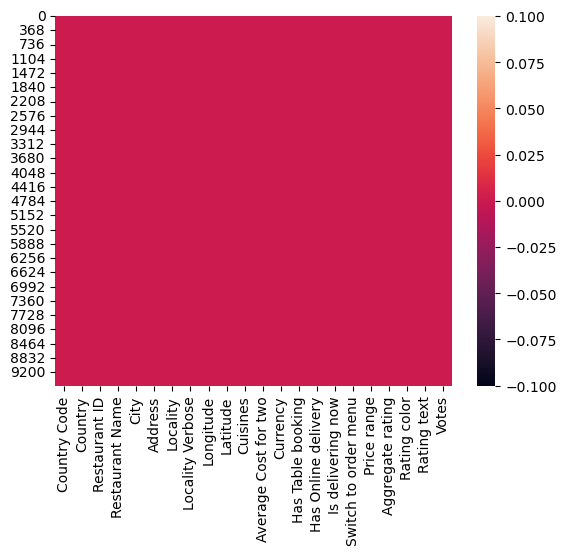

In [16]:
#plotting missing values in heatmap is there is present
sns.heatmap(df.isnull())
plt.show()

Now there are no missing values.


## Checking the Duplicate values

In [17]:
# checking duplicates and removing it

print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 0
After removing duplicates: 0


We can see that there are no duplicate values in our dataset.

In [18]:
# Let us check the value counts of all data:

for columns in df:
    print(columns)
    print(df[columns].value_counts())
    print("_____"*15)

Country Code
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64
___________________________________________________________________________
Country
Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64
___________________________________________________________________________
Restaurant ID
Restaurant ID
3400025     1
309811      1
18460981    1
18287389    1
1629        1
           ..
4096        1
18358700    1
2217        1
18398571    1
17559793    1
Name: count, Length: 9551, dtype: int64
_______

In [19]:
# Checking unique values of every columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'Country Code':
[  1  14  30  37  94 148 162 166 184 189 191 208 214 215 216]


Unique values in column 'Country':
['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States']


Unique values in column 'Restaurant ID':
[ 3400025  3400341  3400005 ... 17697332 17694056 17559793]


Unique values in column 'Restaurant Name':
['Jahanpanah' 'Rangrezz Restaurant' 'Time2Eat - Mama Chicken' ...
 'Tokyo Japanese Steak House' "Theo Yianni's Authentic Greek Restaurant"
 "Fishpatrick's Crabby Cafe"]


Unique values in column 'City':
['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' 'Mangalore'
 'Mohali' 'Mumbai' 'Mysore' 'Nagpur' 'Nashik' 'New

In [20]:
o_c=[]

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        o_c.append(i)
o_c

['Country',
 'Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [21]:
n_c=[]

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        n_c.append(i)
n_c

['Country Code',
 'Restaurant ID',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [22]:
df.shape

(9551, 22)

## Statistical Data

In [23]:
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [24]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [25]:
df.columns = df.columns.str.replace(' ', '_')   # replace blanck space to _


In [26]:
df.columns

Index(['Country_Code', 'Country', 'Restaurant_ID', 'Restaurant_Name', 'City',
       'Address', 'Locality', 'Locality_Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

## Visual Analysis

### countplot

In [27]:
for i in ['Price_range','Has_Online_delivery','Has_Table_booking','Switch_to_order_menu','Rating_color','Rating_text','Aggregate_rating']:
    print(df[i].unique())

[3 2 4 1]
['No' 'Yes']
['No' 'Yes']
['No']
['Yellow' 'Green' 'Orange' 'Dark Green' 'White' 'Red']
['Good' 'Very Good' 'Average' 'Excellent' 'Not rated' 'Poor']
[3.9 3.5 3.6 4.  4.2 4.3 3.8 4.1 3.4 4.9 3.7 4.4 4.5 4.6 3.3 3.2 3.1 4.7
 4.8 2.9 2.8 3.  0.  2.1 2.7 2.4 2.6 2.5 1.8 2.2 2.  2.3 1.9]


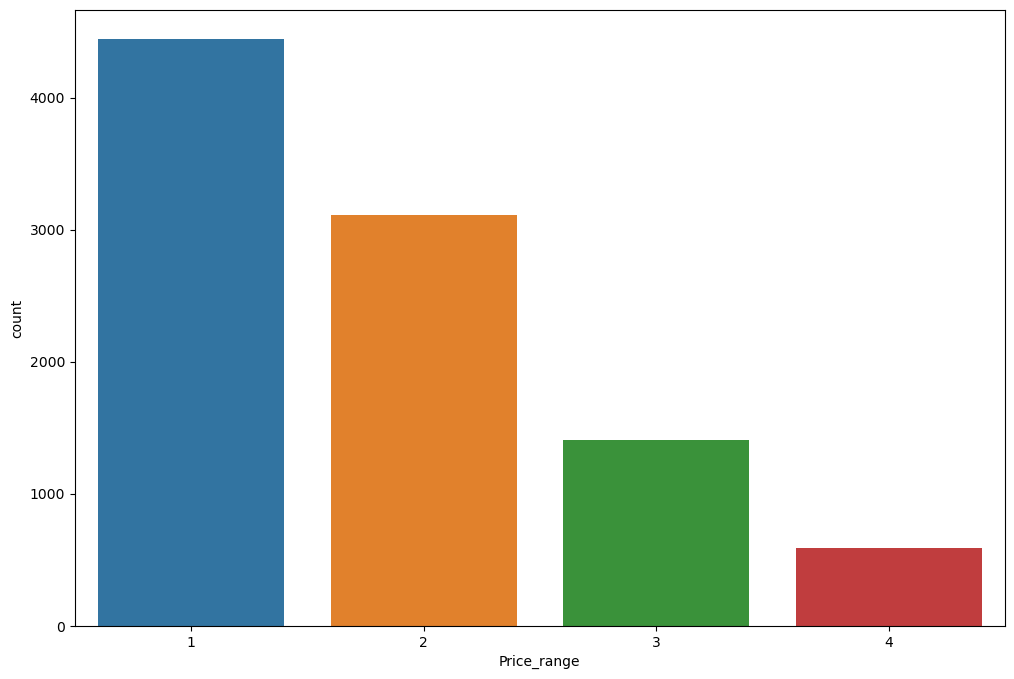

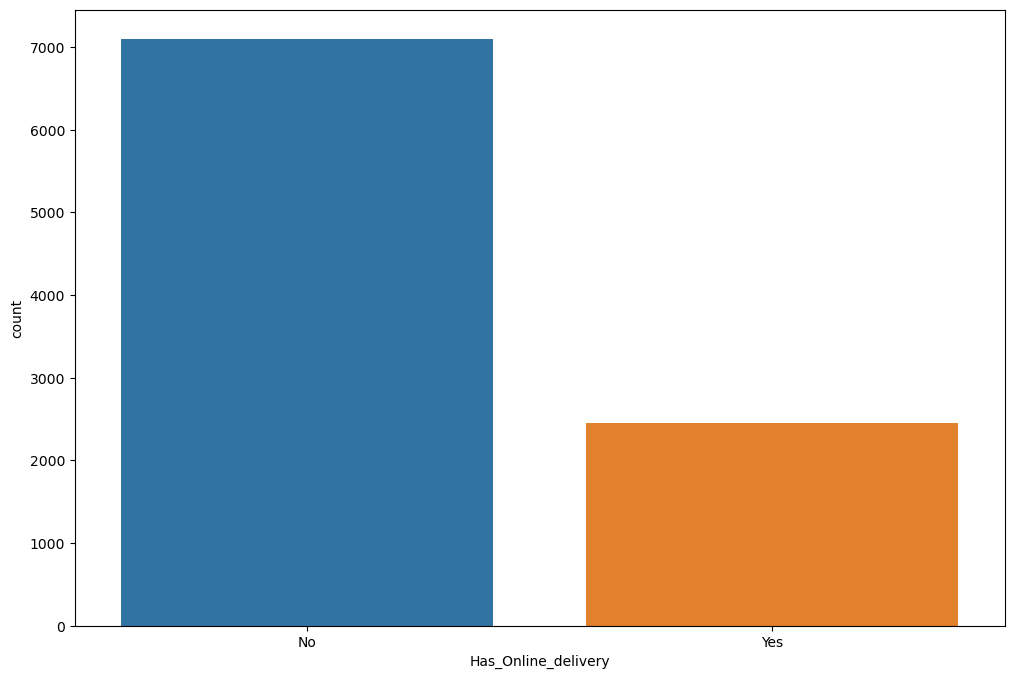

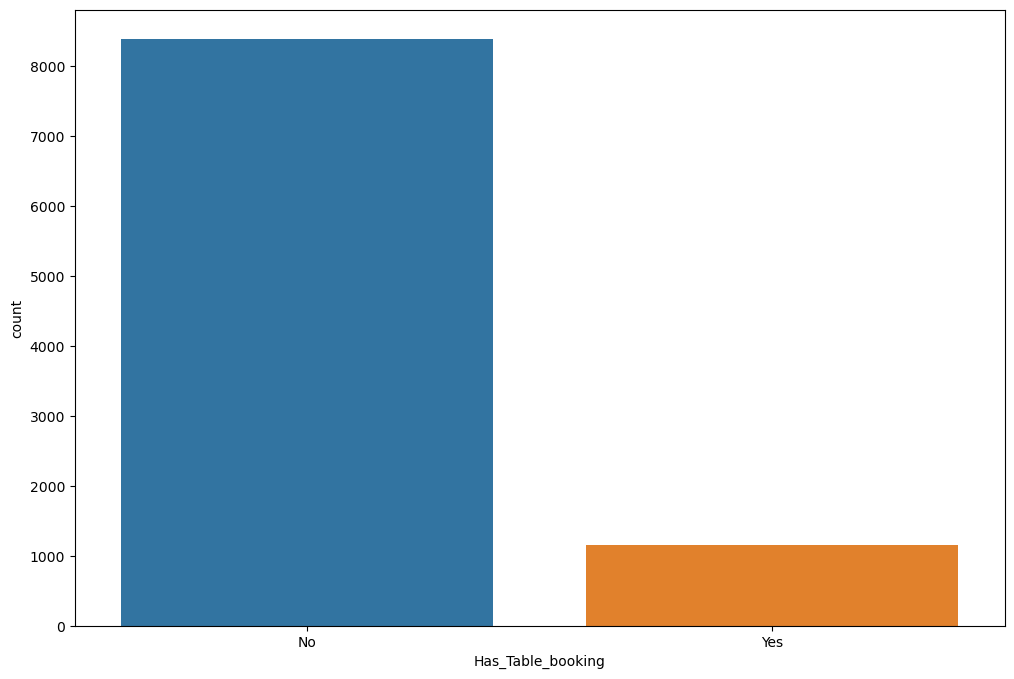

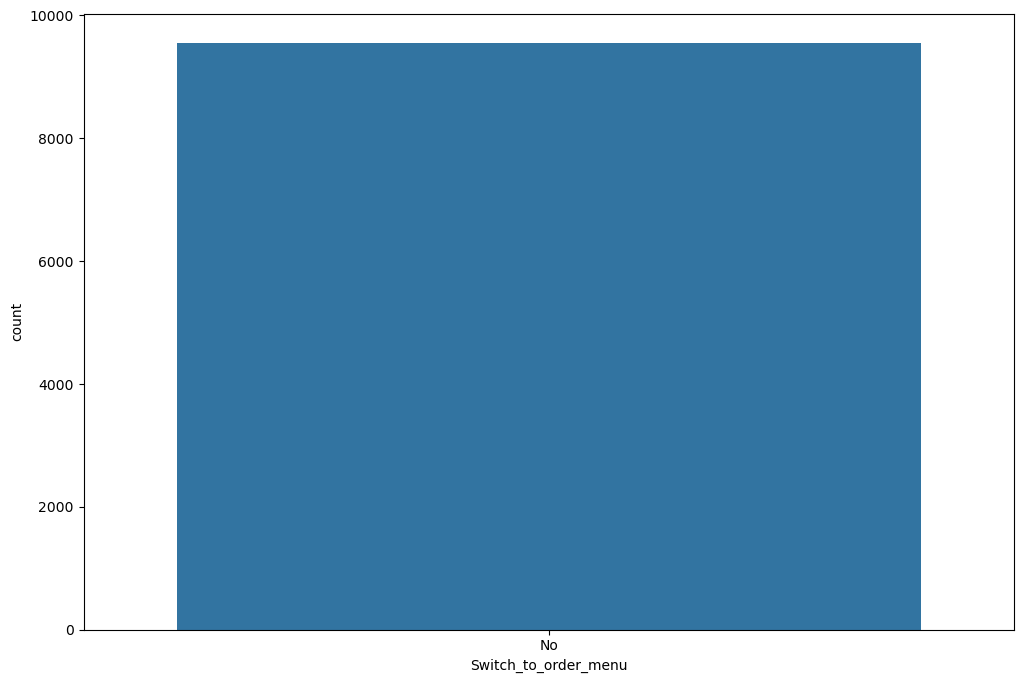

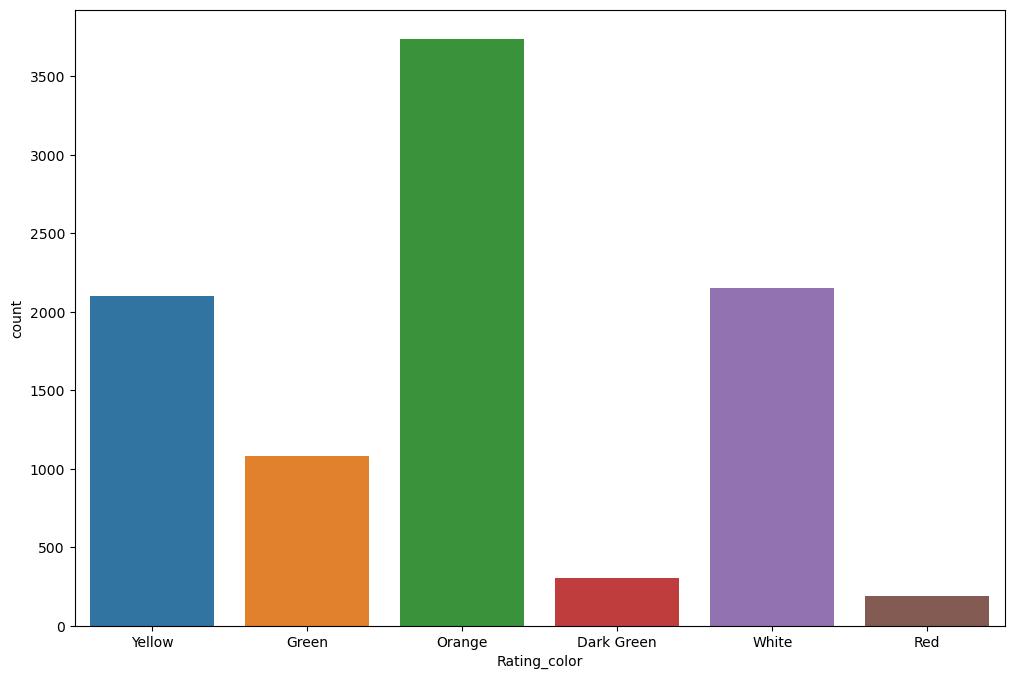

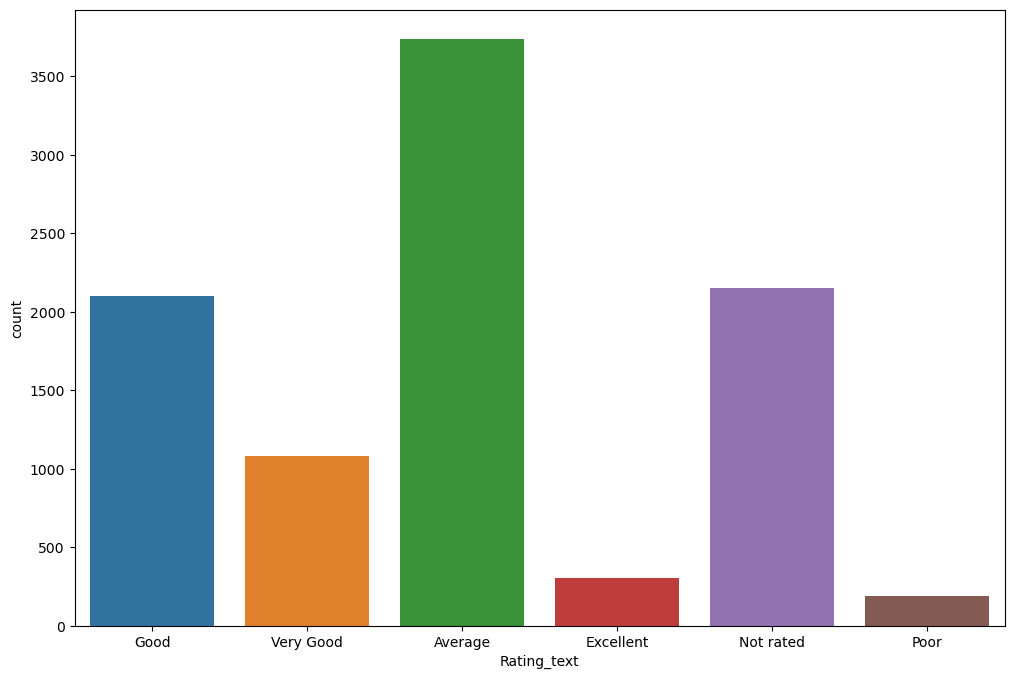

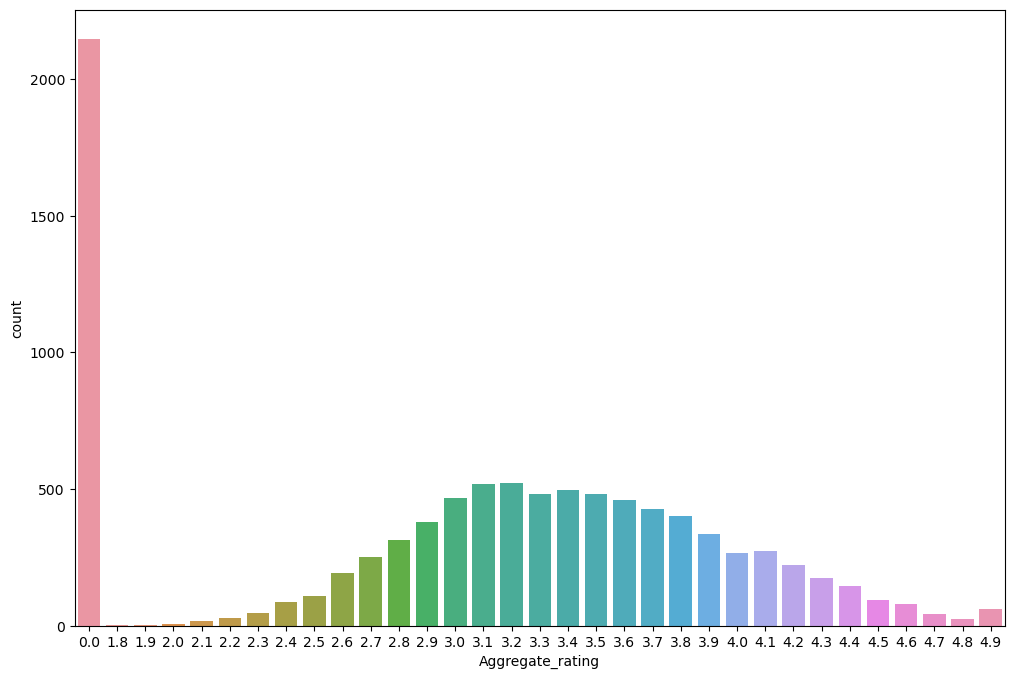

In [28]:
for i in ['Price_range','Has_Online_delivery','Has_Table_booking','Switch_to_order_menu','Rating_color','Rating_text','Aggregate_rating']:
    df[i].unique()
    fig, ax =plt.subplots()
    fig.set_size_inches(12,8)
    sns.countplot(x=i,data=df)

In [29]:
df.columns

Index(['Country_Code', 'Country', 'Restaurant_ID', 'Restaurant_Name', 'City',
       'Address', 'Locality', 'Locality_Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

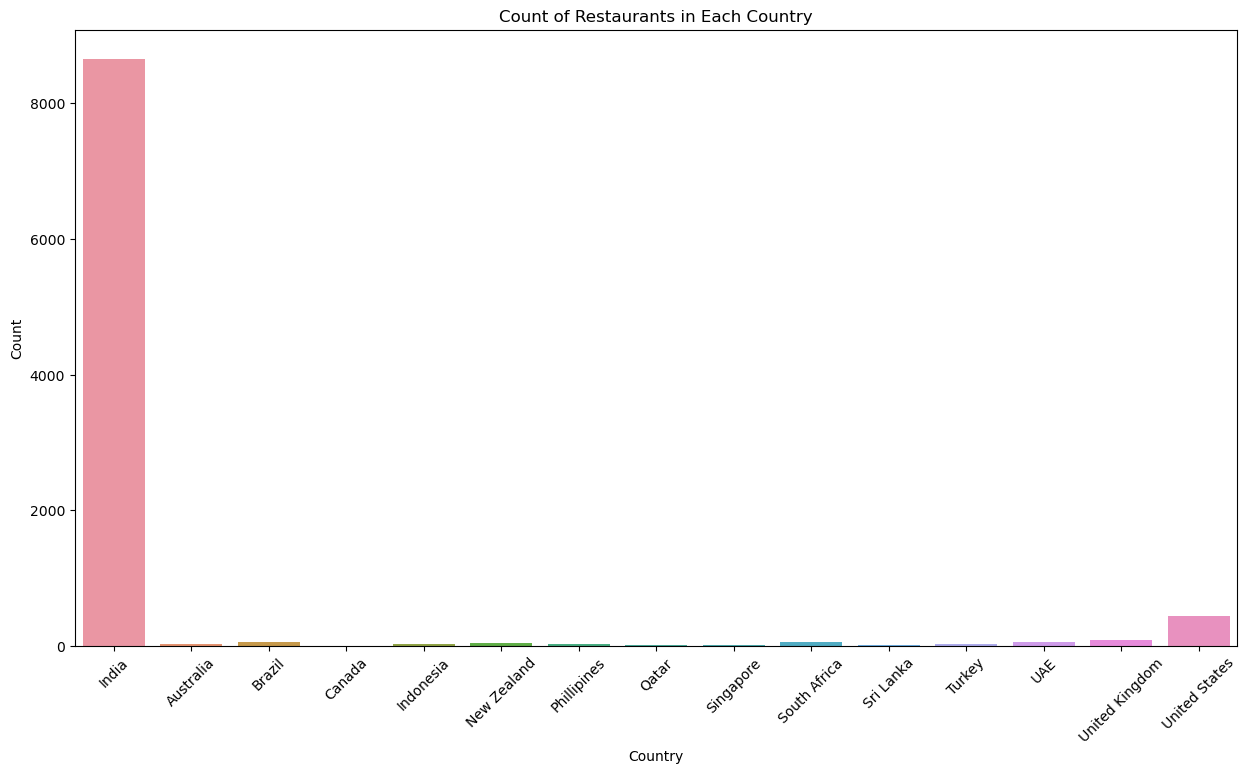

In [30]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Country', data=df)
plt.title('Count of Restaurants in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


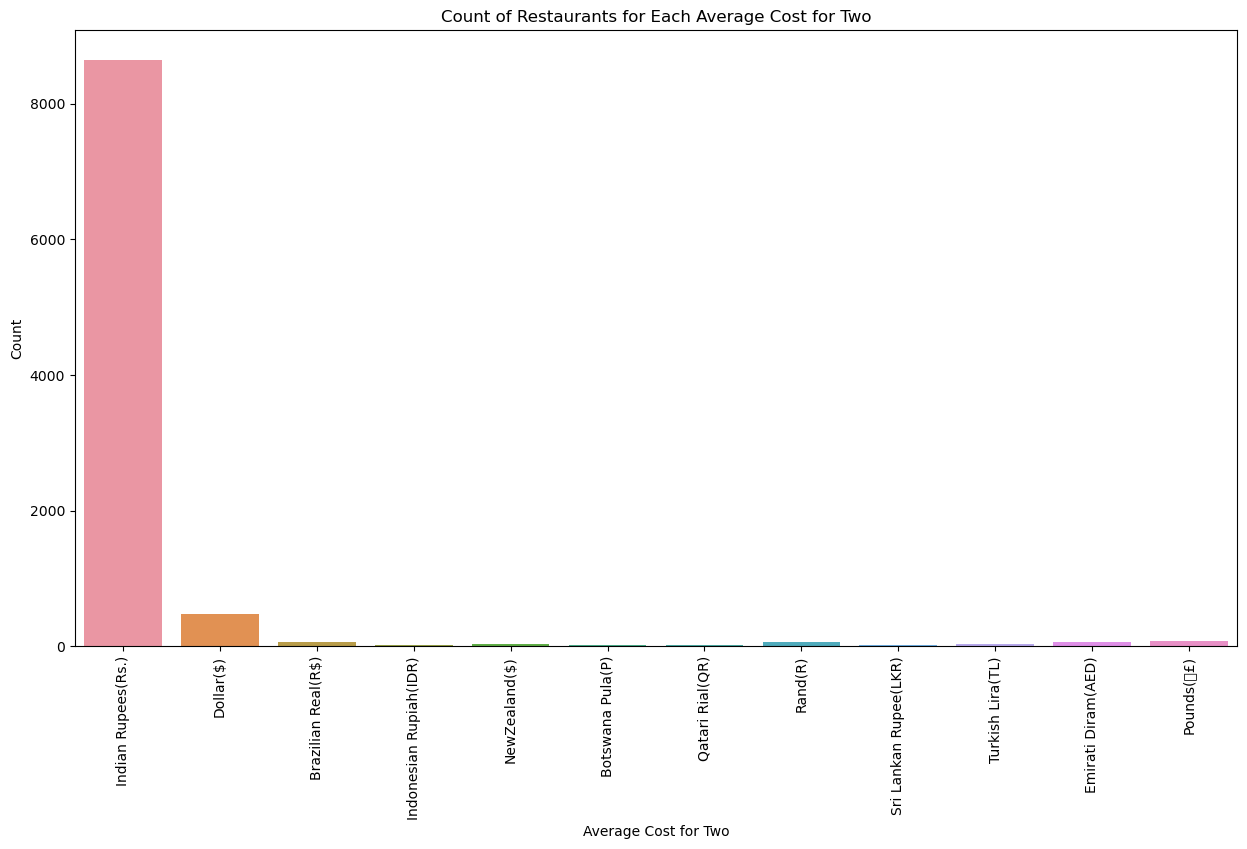

In [31]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Currency', data=df)
plt.title('Count of Restaurants for Each Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


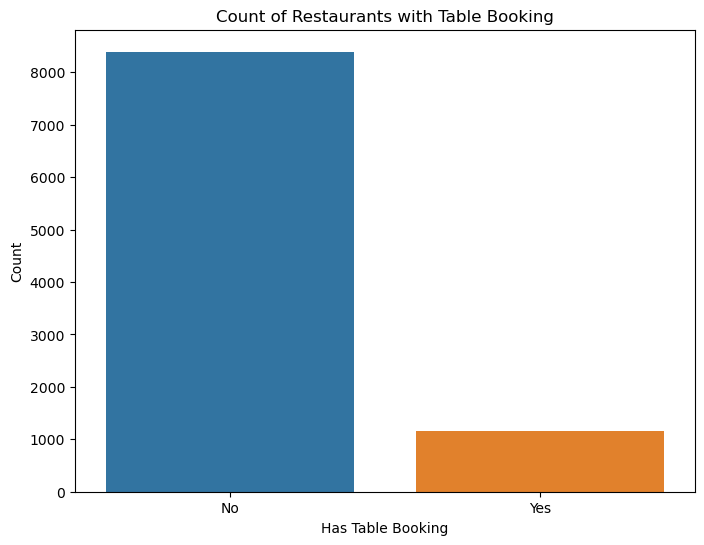

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Has_Table_booking', data=df)
plt.title('Count of Restaurants with Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Count')
plt.show()


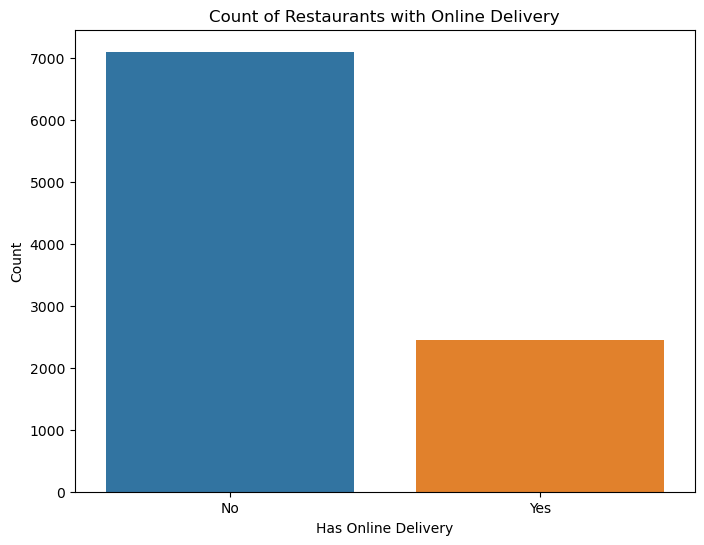

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Has_Online_delivery', data=df)
plt.title('Count of Restaurants with Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Count')
plt.show()


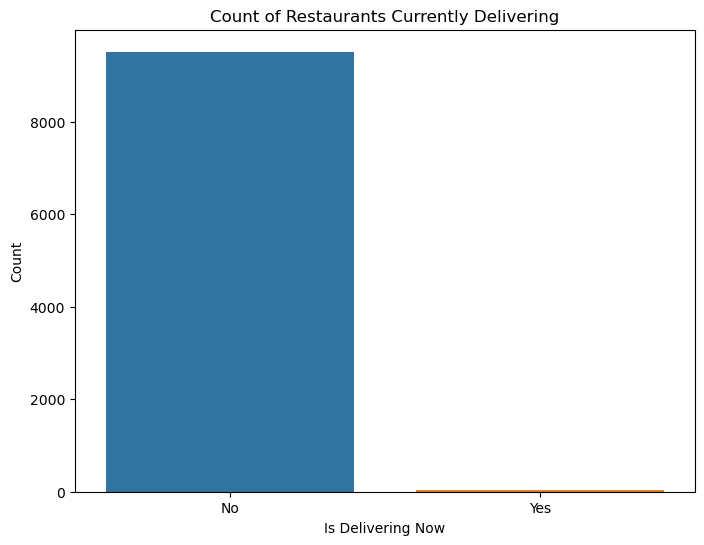

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Is_delivering_now', data=df)
plt.title('Count of Restaurants Currently Delivering')
plt.xlabel('Is Delivering Now')
plt.ylabel('Count')
plt.show()


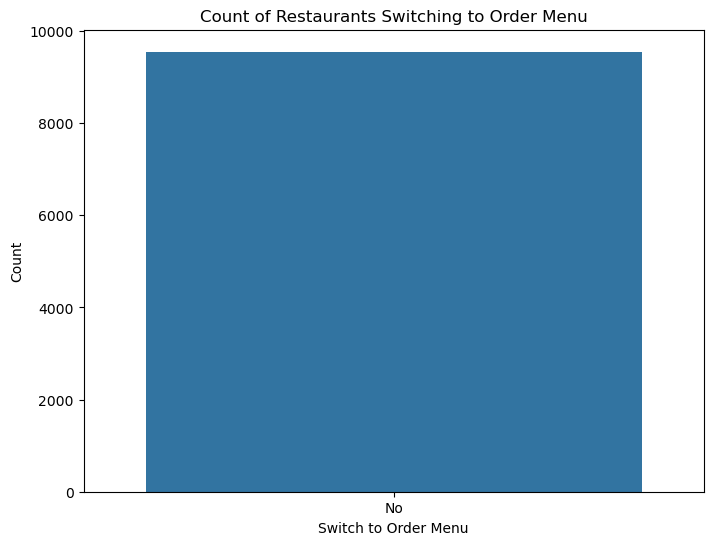

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Switch_to_order_menu', data=df)
plt.title('Count of Restaurants Switching to Order Menu')
plt.xlabel('Switch to Order Menu')
plt.ylabel('Count')
plt.show()


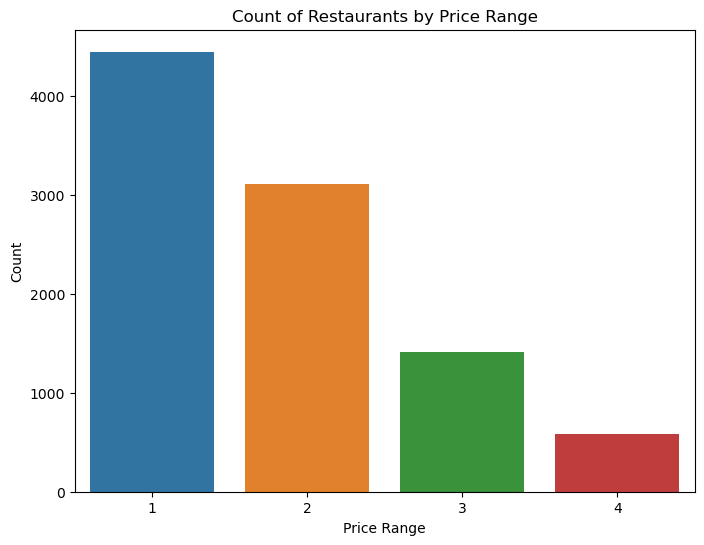

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Price_range', data=df)
plt.title('Count of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


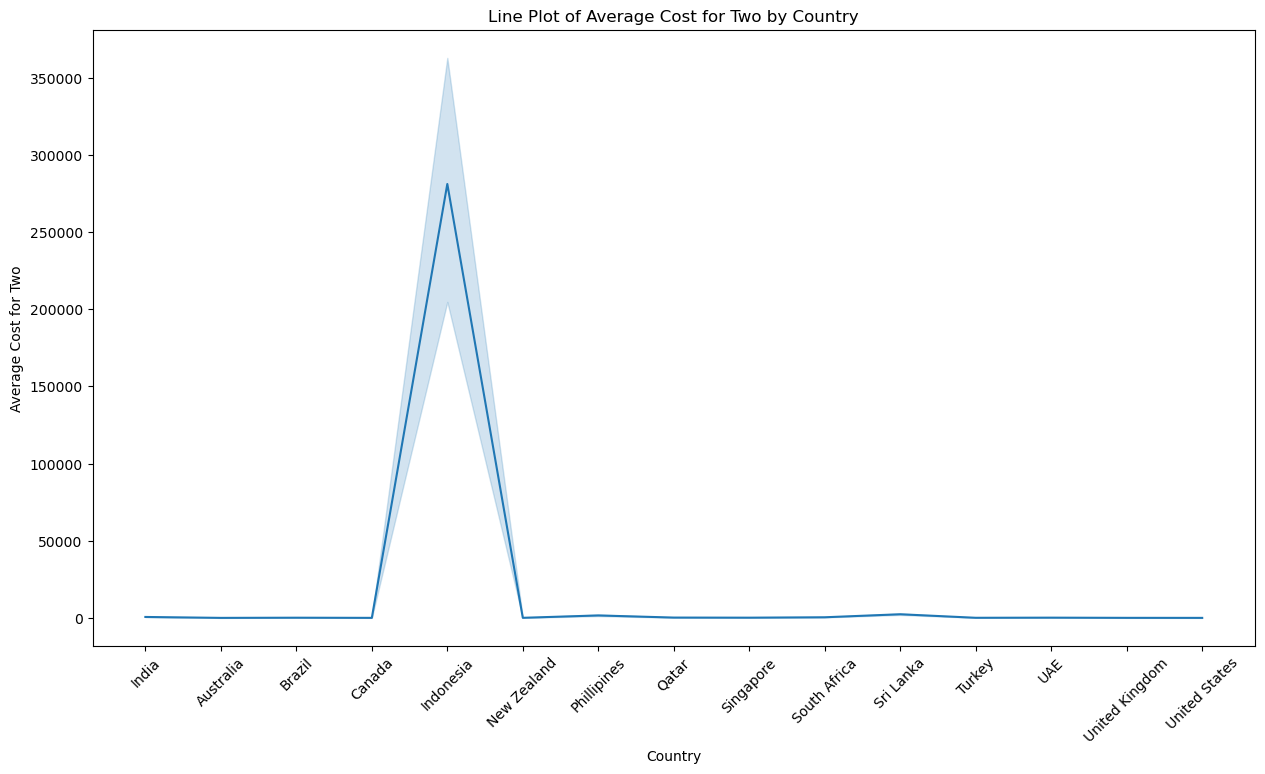

In [37]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Country', y='Average_Cost_for_two', data=df)
plt.title('Line Plot of Average Cost for Two by Country')
plt.xlabel('Country')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=45)
plt.show()


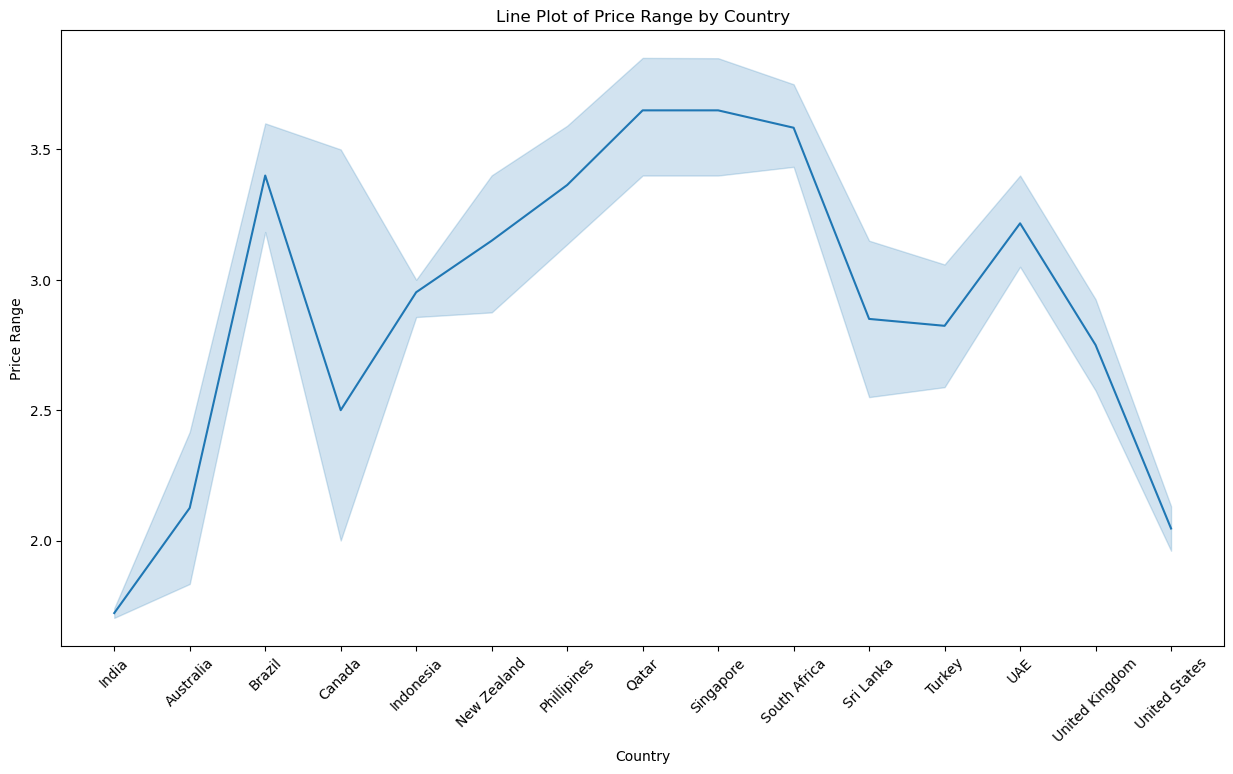

In [38]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Country', y='Price_range', data=df)
plt.title('Line Plot of Price Range by Country')
plt.xlabel('Country')
plt.ylabel('Price Range')
plt.xticks(rotation=45)
plt.show()


In [39]:
df.columns

Index(['Country_Code', 'Country', 'Restaurant_ID', 'Restaurant_Name', 'City',
       'Address', 'Locality', 'Locality_Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

In [40]:
df.dtypes

Country_Code              int64
Country                  object
Restaurant_ID             int64
Restaurant_Name          object
City                     object
Address                  object
Locality                 object
Locality_Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average_Cost_for_two      int64
Currency                 object
Has_Table_booking        object
Has_Online_delivery      object
Is_delivering_now        object
Switch_to_order_menu     object
Price_range               int64
Aggregate_rating        float64
Rating_color             object
Rating_text              object
Votes                     int64
dtype: object

In [41]:
columns_to_drop = ['Country', 'Restaurant_ID', 'Restaurant_Name', 'Locality', 'Address', 'Locality_Verbose', 'Cuisines', 'Switch_to_order_menu']
df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [42]:
df.columns

Index(['Country_Code', 'City', 'Longitude', 'Latitude', 'Average_Cost_for_two',
       'Currency', 'Has_Table_booking', 'Has_Online_delivery',
       'Is_delivering_now', 'Price_range', 'Aggregate_rating', 'Rating_color',
       'Rating_text', 'Votes'],
      dtype='object')

In [43]:
df.dtypes

Country_Code              int64
City                     object
Longitude               float64
Latitude                float64
Average_Cost_for_two      int64
Currency                 object
Has_Table_booking        object
Has_Online_delivery      object
Is_delivering_now        object
Price_range               int64
Aggregate_rating        float64
Rating_color             object
Rating_text              object
Votes                     int64
dtype: object

## Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

clms = ['City', 'Currency', 'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now', 'Rating_color', 'Rating_text']

for column in clms:
    df[column] = le.fit_transform(df[column])



In [45]:
df.dtypes

Country_Code              int64
City                      int32
Longitude               float64
Latitude                float64
Average_Cost_for_two      int64
Currency                  int32
Has_Table_booking         int32
Has_Online_delivery       int32
Is_delivering_now         int32
Price_range               int64
Aggregate_rating        float64
Rating_color              int32
Rating_text               int32
Votes                     int64
dtype: object

In [46]:
df.sample(4)

,Country_Code,City,Longitude,Latitude,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
3466,1,88,0.000000,0.000000,200,4,0,0,0,1,3.1,2,0,10
1559,1,50,77.096912,28.450974,2500,4,1,0,0,4,3.5,5,2,13
4208,1,88,77.245041,28.574530,450,4,0,1,0,1,2.6,2,0,102
6058,1,88,0.000000,0.000000,2000,4,1,0,0,4,3.8,5,2,52


## Lets check the skewness:


In [47]:
df.skew()

Country_Code             3.043965
City                    -1.193777
Longitude               -2.807328
Latitude                -3.081635
Average_Cost_for_two    35.477915
Currency                 2.858093
Has_Table_booking        2.321100
Has_Online_delivery      1.114620
Is_delivering_now       16.673412
Price_range              0.889618
Aggregate_rating        -0.954130
Rating_color             0.046009
Rating_text              0.431408
Votes                    8.807637
dtype: float64

## Correlation

In [48]:
df.corr()

,Country_Code,City,Longitude,Latitude,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
Country_Code,1.000000,-0.181728,-0.698299,0.019792,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,0.243327,0.282189,-0.187174,0.222685,0.154530
City,-0.181728,1.000000,0.117391,-0.004301,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.078406
Longitude,-0.698299,0.117391,1.000000,0.043207,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.085101
Latitude,0.019792,-0.004301,0.043207,1.000000,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,-0.022962
Average_Cost_for_two,0.043225,-0.028838,0.045891,-0.111088,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.067783
Currency,-0.033466,-0.071996,0.337334,-0.101864,0.045615,1.000000,0.000640,0.006991,0.001458,0.075179,-0.006939,-0.040430,0.014598,-0.027111
Has_Table_booking,-0.061682,-0.003762,0.100488,0.054658,0.007758,0.000640,1.000000,0.101224,-0.016816,0.501925,0.189998,-0.021365,0.044043,0.169422
Has_Online_delivery,-0.154605,0.012723,0.178757,0.118722,-0.018974,0.006991,0.101224,1.000000,0.101730,0.077918,0.225699,0.011477,-0.080937,0.074303
Is_delivering_now,-0.018291,-0.014039,0.018787,0.015001,-0.001862,0.001458,-0.016816,0.101730,1.000000,0.010940,0.019180,0.001886,-0.031970,-0.001124
Price_range,0.243327,-0.105759,-0.078939,-0.166688,0.075083,0.075179,0.501925,0.077918,0.010940,1.000000,0.437944,-0.140468,0.164242,0.309444


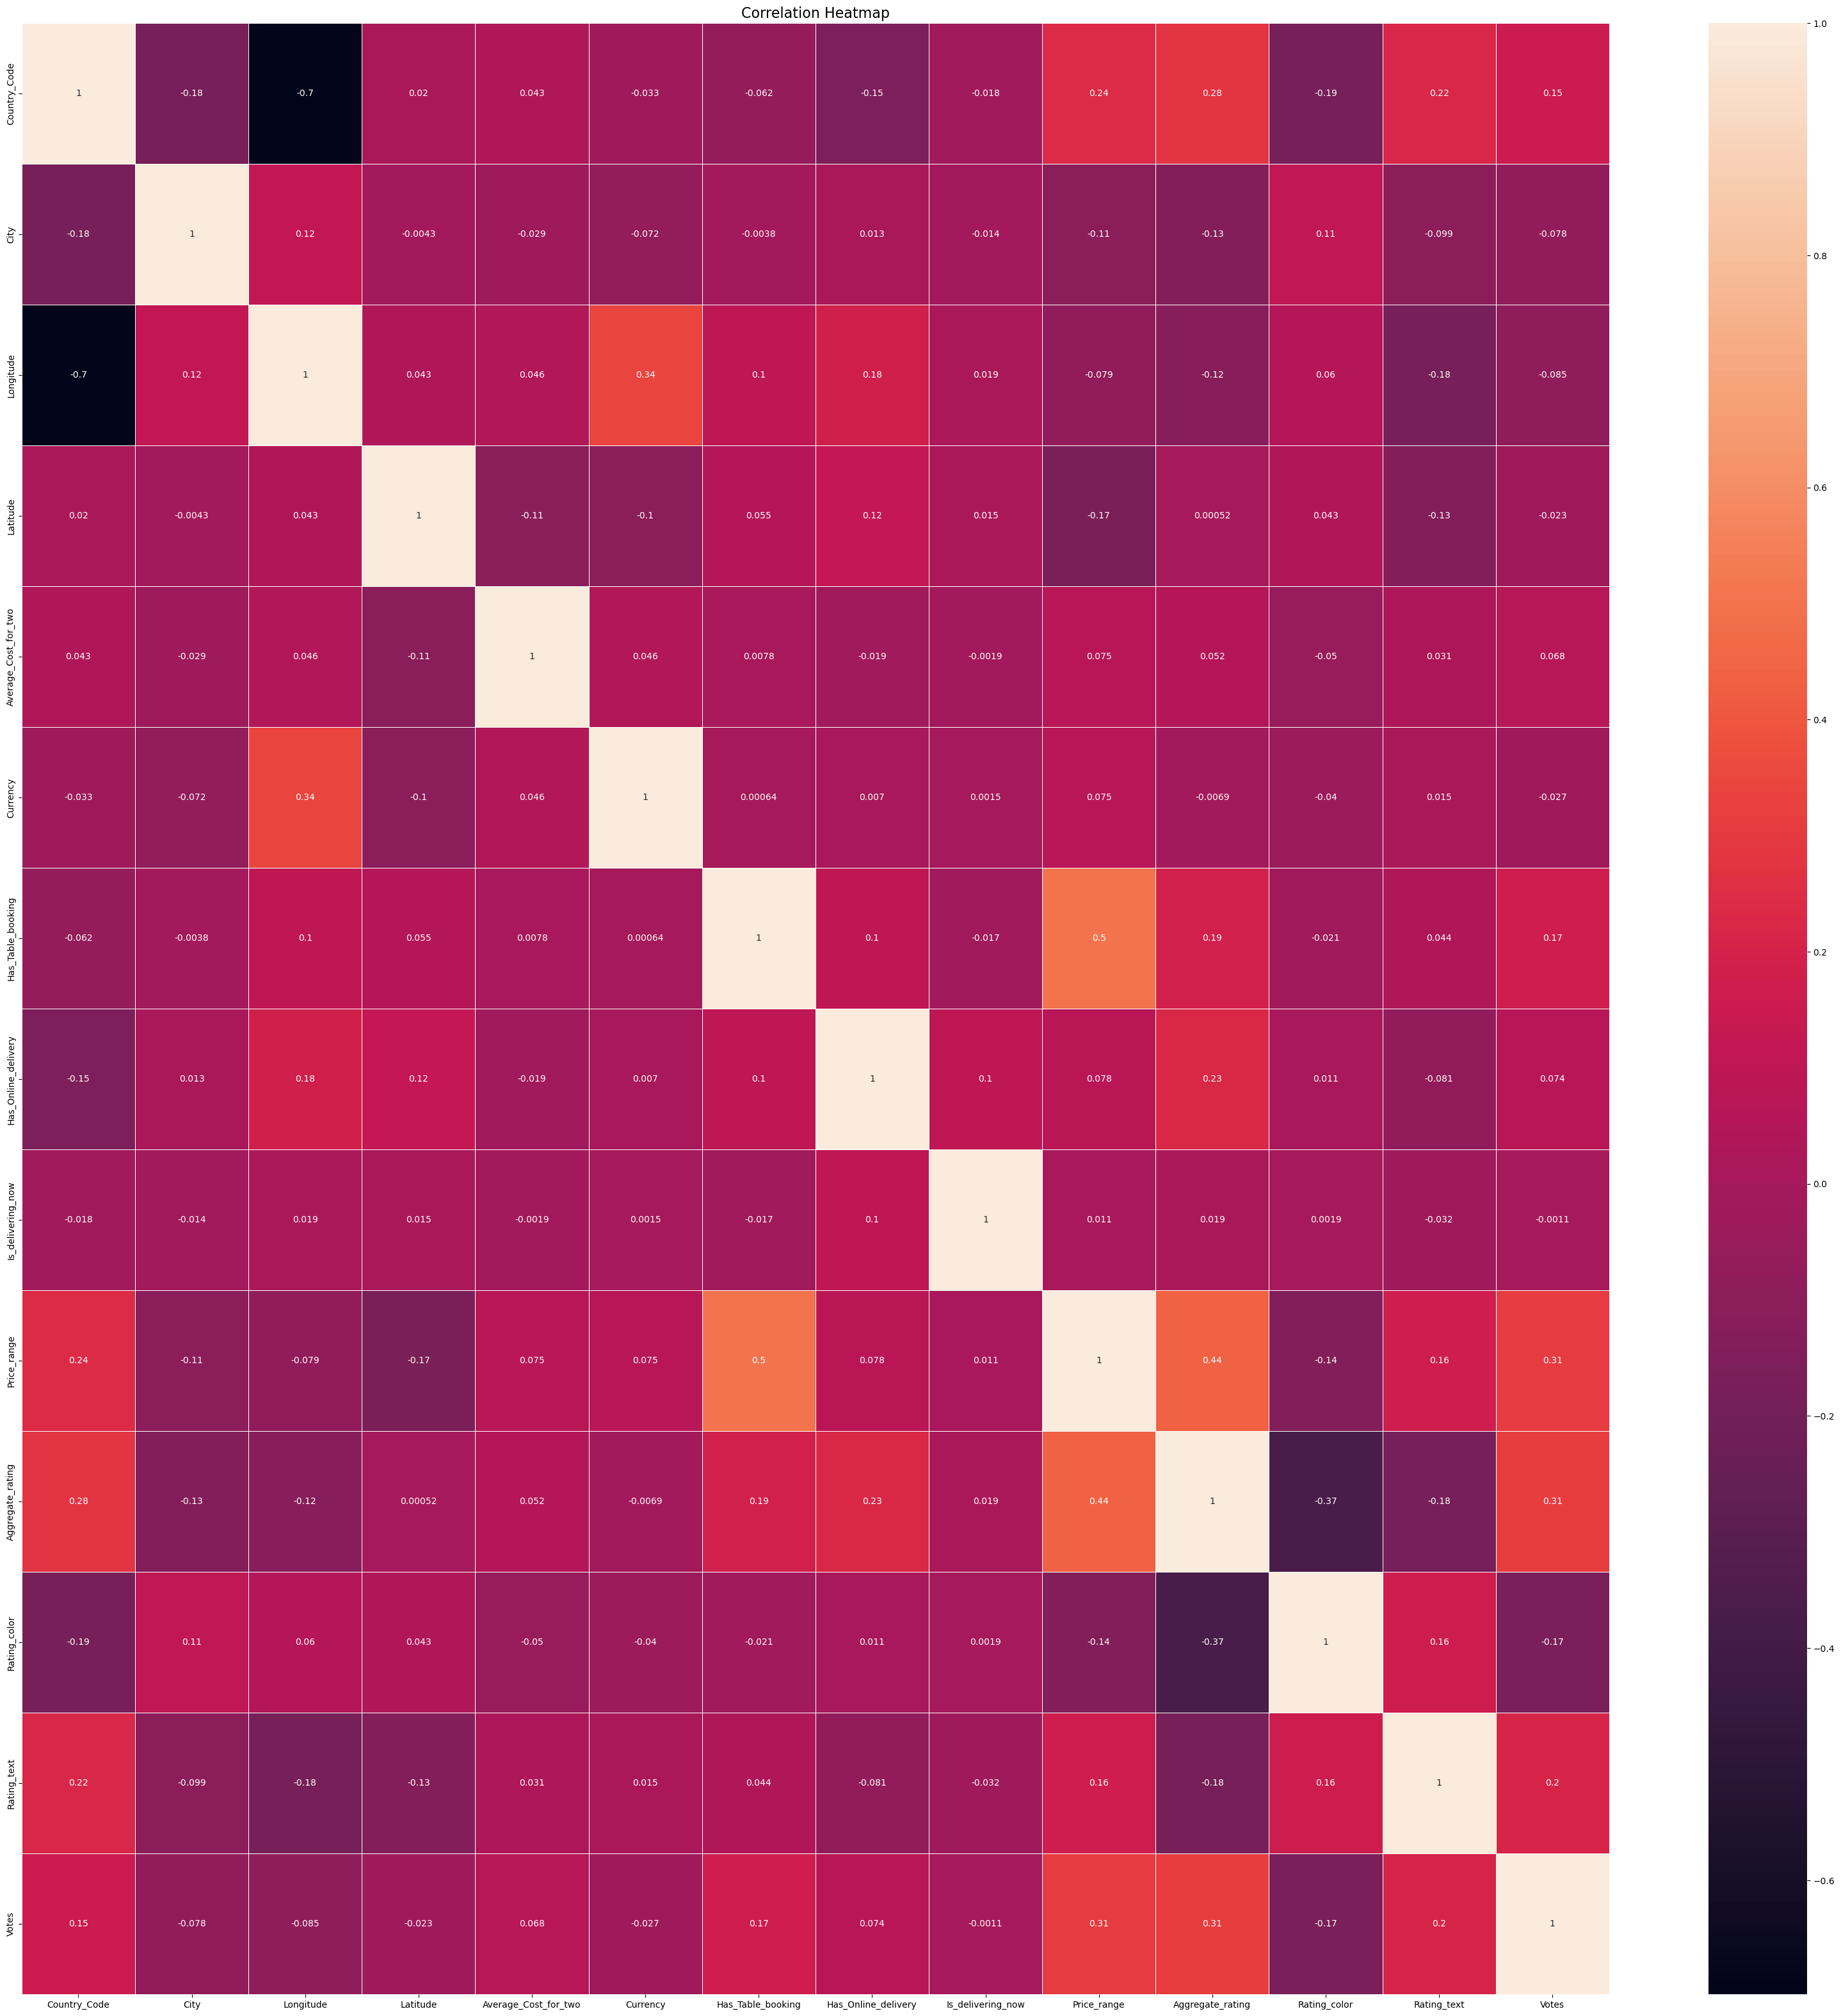

In [49]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

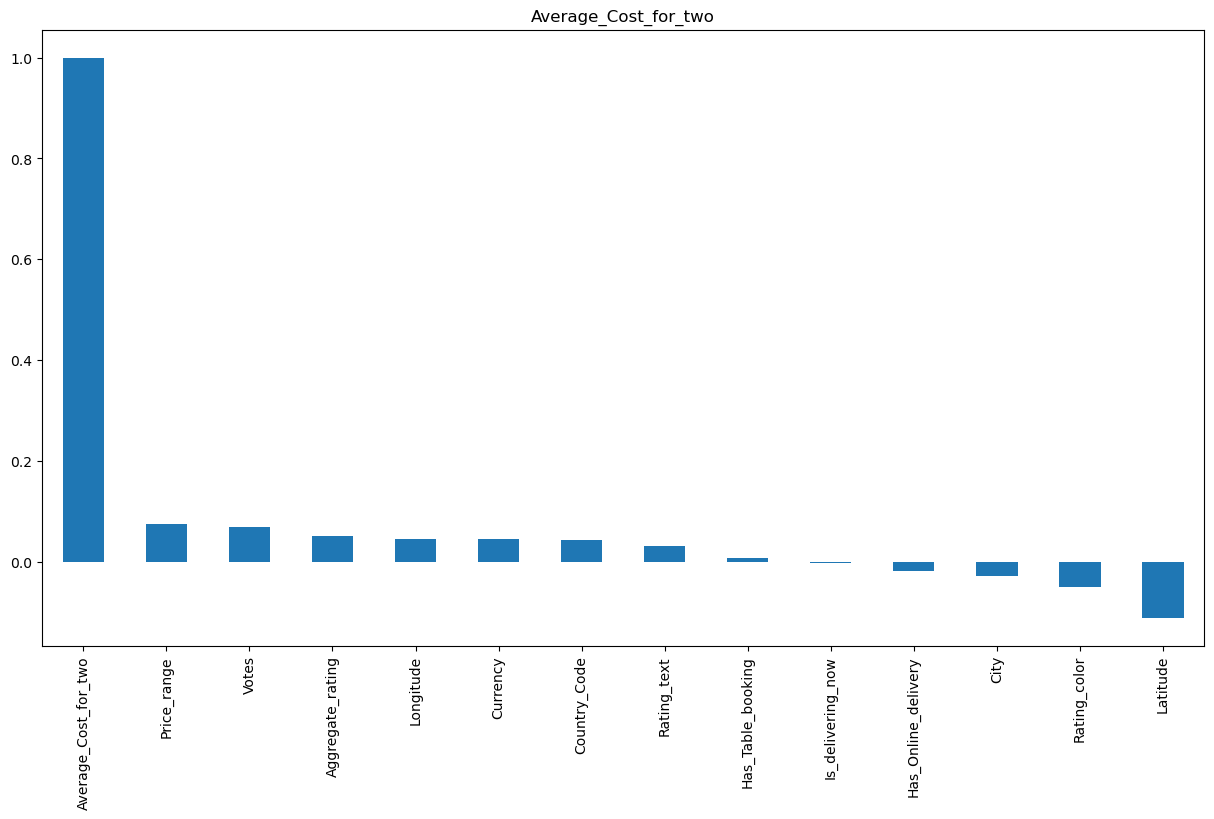

In [50]:
corr = df.corr()

plt.figure(figsize=(15, 8))
corr['Average_Cost_for_two'].sort_values(ascending=False).plot(kind='bar')
plt.title('Average_Cost_for_two')

plt.show()

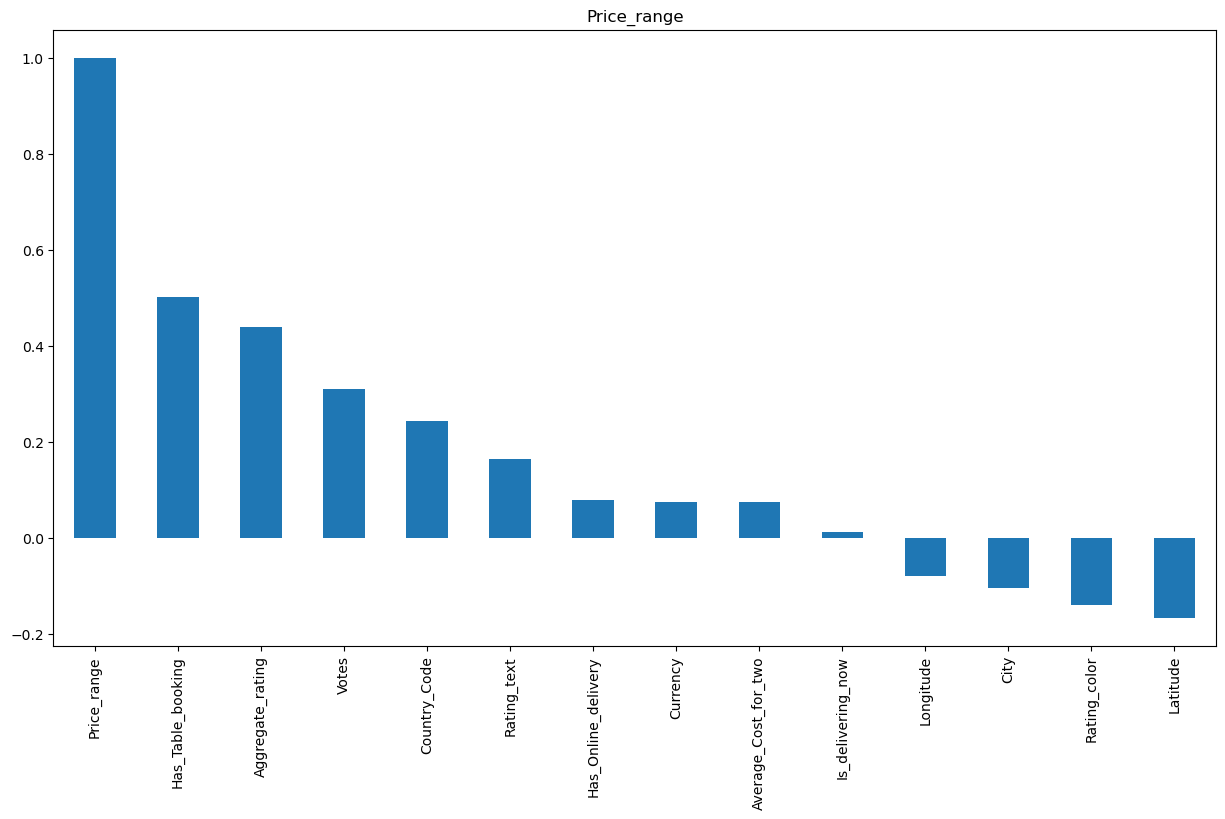

In [51]:
corr = df.corr()

plt.figure(figsize=(15, 8))
corr['Price_range'].sort_values(ascending=False).plot(kind='bar')
plt.title('Price_range')
plt.show()

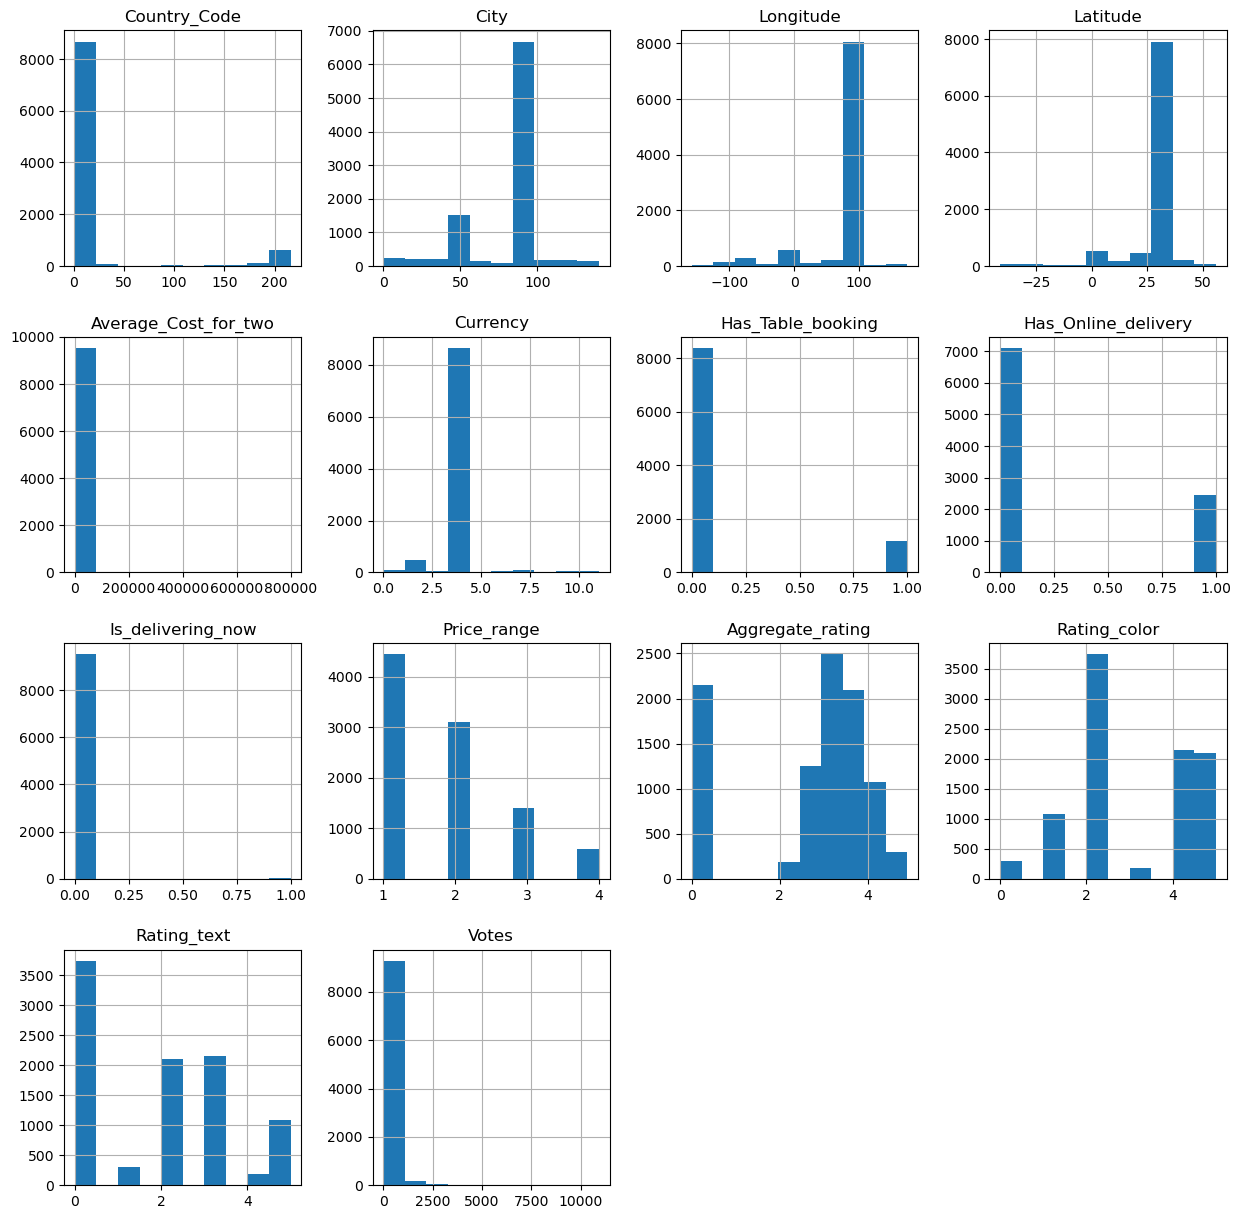

In [52]:
df.hist(figsize=(15,15))
plt.show()

## Seperating Label "y" and Features "x" for our 1st model to predict Average Cost for two

In [53]:
x = df.drop('Average_Cost_for_two', axis=1)
y = df['Average_Cost_for_two']

## Feature Scaling

In [54]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head(10)

,Country_Code,City,Longitude,Latitude,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,-0.306015,-3.332289,0.334861,0.118764,0.024395,-0.371446,-0.587547,-0.059771,1.319803,0.81358,1.371170,0.124686,-0.039312
1,-0.306015,-3.332289,-1.546527,-2.348827,0.024395,-0.371446,-0.587547,-0.059771,0.215516,0.54978,1.371170,0.124686,-0.199722
2,-0.306015,-3.332289,0.334862,0.118689,0.024395,-0.371446,-0.587547,-0.059771,0.215516,0.61573,1.371170,0.124686,-0.146252
3,-0.306015,-3.332289,0.334536,0.121877,0.024395,-0.371446,-0.587547,-0.059771,0.215516,0.87953,-1.308053,1.895070,-0.162525
4,-0.306015,-3.332289,0.334765,0.122404,0.024395,-0.371446,-0.587547,-0.059771,1.319803,1.01143,-1.308053,1.895070,0.046706
5,-0.306015,-3.332289,-1.546527,-2.348827,0.024395,-0.371446,-0.587547,-0.059771,2.424090,0.87953,-1.308053,1.895070,-0.260167
6,-0.306015,-3.332289,0.335646,0.118698,0.024395,-0.371446,-0.587547,-0.059771,2.424090,1.07738,-1.308053,1.895070,-0.055585
7,-0.306015,-3.332289,0.335646,0.118698,0.024395,-0.371446,-0.587547,-0.059771,2.424090,0.87953,-1.308053,1.895070,-0.269466
8,-0.306015,-3.332289,-1.546527,-2.348827,0.024395,-0.371446,-0.587547,-0.059771,1.319803,0.61573,1.371170,0.124686,-0.227619
9,-0.306015,-3.332289,0.335958,0.118913,0.024395,-0.371446,-0.587547,-0.059771,2.424090,0.74763,1.371170,0.124686,-0.257842


## Checking VIF(Variance Inflation Factor) values:

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                     for i in range (len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,2.649048,Country_Code
1,1.064003,City
2,2.551126,Longitude
3,1.139837,Latitude
4,1.288733,Currency
5,1.459204,Has_Table_booking
6,1.159212,Has_Online_delivery
7,1.012933,Is_delivering_now
8,1.912117,Price_range
9,1.786557,Aggregate_rating


All VIF values are kess than 10 so we can proceed 

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)

## RandomForestRegressor

R-squared (R2): 0.6958871691662871
Mean Absolute Error (MAE): 617.6674071355789
Mean Squared Error (MSE): 172327836.81561986
Root Mean Squared Error (RMSE): 13127.369759994568
Mean Squared Logarithmic Error (MSLE): 0.1442175410646637
Explained Variance Score (EVS): 0.6960120417174087
Median Absolute Error: 78.0
Max Error: 527500.0


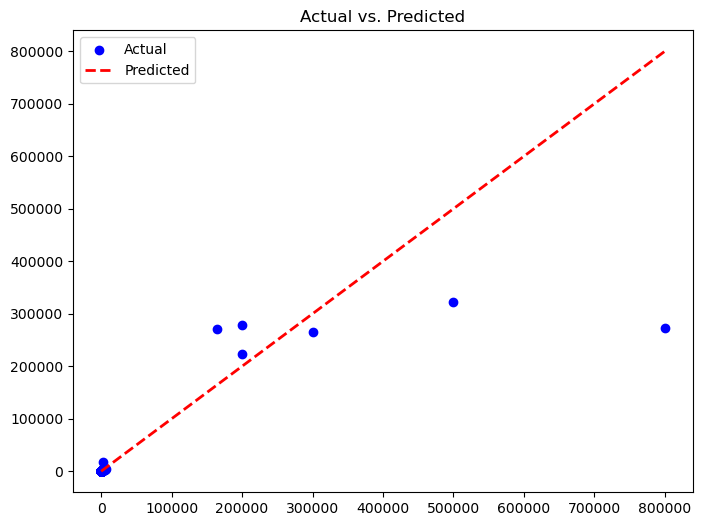

In [57]:
RFR = RandomForestRegressor(criterion='poisson', warm_start=True)
RFR.fit(x_train, y_train)

pred_RFR = RFR.predict(x_test)

r2 = r2_score(y_test, pred_RFR)
mae = mean_absolute_error(y_test, pred_RFR)
mse = mean_squared_error(y_test, pred_RFR)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, pred_RFR)
evs = explained_variance_score(y_test, pred_RFR)
median_err = median_absolute_error(y_test, pred_RFR)
max_err = max_error(y_test, pred_RFR)

print('R-squared (R2):', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Squared Logarithmic Error (MSLE):', msle)
print('Explained Variance Score (EVS):', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_RFR, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


## LinearRegression

R-squared: 0.02895984668981033
Mean Absolute Error: 2017.6503093156537
Mean Squared Error: 548192487.6403296
Root Mean Squared Error: 23413.510792709614
Mean Absolute Percentage Error: 1.0912937711266342e+16
Explained Variance Score: 0.033122737408749825
Median Absolute Error: 319.0499147720567
Max Error: 787583.9655681289


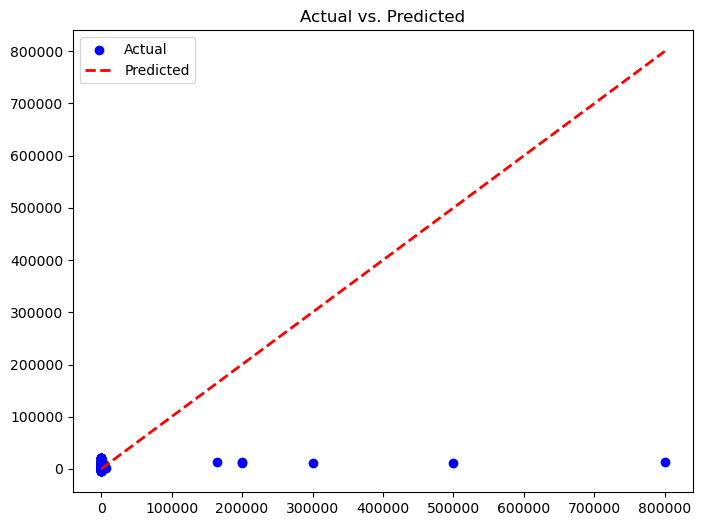

In [58]:
LR= LinearRegression()
LR.fit(x_train, y_train)
pred_LR=LR.predict(x_test)

r2 = LR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_LR)
mse = mean_squared_error(y_test, pred_LR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_LR)
evs = explained_variance_score(y_test, pred_LR)
median_err = median_absolute_error(y_test, pred_LR)
max_err = max_error(y_test, pred_LR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_LR, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


## KNeighborsRegressor

R-squared: 0.9999983697233242
Mean Absolute Error: 635.2876024719615
Mean Squared Error: 182705387.86030123
Root Mean Squared Error: 13516.855694291526
Mean Absolute Percentage Error: 2671122908826257.5
Mean Squared Logarithmic Error: 0.19089511950094926
Explained Variance Score: 0.6776518474446038
Median Absolute Error: 82.23742755302692
Max Error: 552266.4446351228


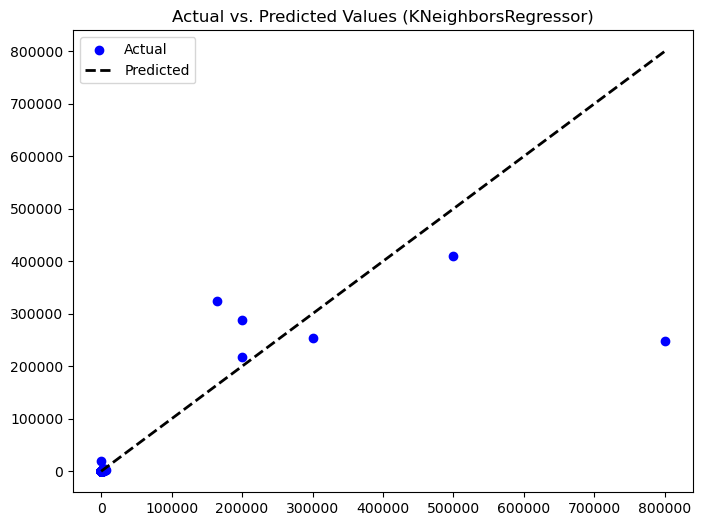

In [59]:
KNN = KNeighborsRegressor(n_neighbors=7,p=1,weights="distance")
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

r2 = KNN.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_KNN)
mse = mean_squared_error(y_test, pred_KNN)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_KNN)
msle = mean_squared_log_error(y_test, pred_KNN)
evs = explained_variance_score(y_test, pred_KNN)
median_err = median_absolute_error(y_test, pred_KNN)
max_err = max_error(y_test, pred_KNN)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_KNN, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted Values (KNeighborsRegressor)')
plt.legend()
plt.show()

## DecisionTreeRegressor

R-squared: 0.9999984133501567
Mean Absolute Error: 753.836198181162
Mean Squared Error: 228310768.533919
Root Mean Squared Error: 15109.95594083315
Mean Absolute Percentage Error: 235667170453715.44
Mean Squared Logarithmic Error: 0.21541457314151516
Explained Variance Score: 0.5976711179260985
Median Absolute Error: 100.0
Max Error: 550000.0


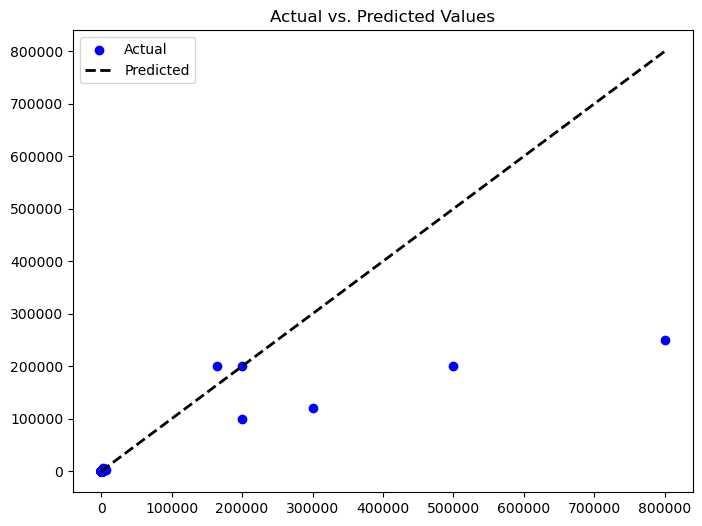

In [60]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)

r2 = DTR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_DTR)
mse = mean_squared_error(y_test, pred_DTR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_DTR)
msle = mean_squared_log_error(y_test, pred_DTR)
evs = explained_variance_score(y_test, pred_DTR)
median_err = median_absolute_error(y_test, pred_DTR)
max_err = max_error(y_test, pred_DTR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_DTR, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## Ridge

In [61]:
RR = Ridge()
RR.fit(x_train,y_train)
pred_RR = RR.predict(x_test)


r2 = RR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_RR)
mse = mean_squared_error(y_test, pred_RR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_RR)
evs = explained_variance_score(y_test, pred_RR)
median_err = median_absolute_error(y_test, pred_RR)
max_err = max_error(y_test, pred_RR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)



R-squared: 0.02895984279343866
Mean Absolute Error: 2017.5468797115172
Mean Squared Error: 548195892.4138505
Root Mean Squared Error: 23413.583502186302
Mean Absolute Percentage Error: 1.0917206455217552e+16
Explained Variance Score: 0.03311675988661367
Median Absolute Error: 319.14999642859266
Max Error: 787587.0450192253


## Lasso

In [62]:
L = Lasso()
L.fit(x_train,y_train)
pred_L = L.predict(x_test)
print('R2_score',r2_score(y_test,pred_L))
print('Mean absolute error:',mean_absolute_error(y_test,pred_L))
print('Mean squared error:',mean_squared_error(y_test,pred_L))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_L)))

r2 = L.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_L)
mse = mean_squared_error(y_test, pred_L)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_L)
evs = explained_variance_score(y_test, pred_L)
median_err = median_absolute_error(y_test, pred_L)
max_err = max_error(y_test, pred_L)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R2_score 0.03254959790769352
Mean absolute error: 2015.8447317920272
Mean squared error: 548213091.0488601
Root mean squared error: 23413.950778304377
R-squared: 0.028959729530166345
Mean Absolute Error: 2015.8447317920272
Mean Squared Error: 548213091.0488601
Root Mean Squared Error: 23413.950778304377
Mean Absolute Percentage Error: 1.090187941379706e+16
Explained Variance Score: 0.03308662544299157
Median Absolute Error: 317.53483703365566
Max Error: 787601.7159879378


## AdaBoostRegressor

R-squared: 0.9741128376609403
Mean Absolute Error: 756.3928094566791
Mean Squared Error: 182778112.9413274
Root Mean Squared Error: 13519.54558930615
Mean Absolute Percentage Error: 3792111119600148.5
Mean Squared Logarithmic Error: 0.9673564178399446
Explained Variance Score: 0.6775882963262577
Median Absolute Error: 123.32258064516134
Max Error: 524311.9266055046


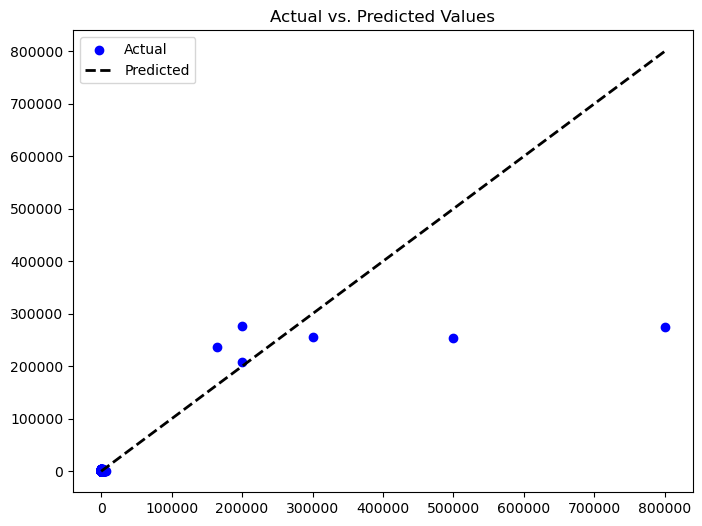

In [63]:
abr = AdaBoostRegressor(learning_rate=.1, n_estimators=100)
abr.fit(x_train,y_train)
pred_abr = abr.predict(x_test)

r2 = abr.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_abr)
mse = mean_squared_error(y_test, pred_abr)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_abr)
msle = mean_squared_log_error(y_test, pred_abr)
evs = explained_variance_score(y_test, pred_abr)
median_err = median_absolute_error(y_test, pred_abr)
max_err = max_error(y_test, pred_abr)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_abr, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## KNeighborsRegressor work better 

In [67]:
values = pd.DataFrame({'Actual': y_test, 'Predicted': pred_KNN})
values.sample(10)

,Actual,Predicted
1730,1500,1416.639436
6415,250,317.137080
1757,600,830.572474
3577,600,660.770631
6165,400,345.852497
2292,300,382.832748
572,500,576.486239
6693,300,287.340803
8460,700,543.510862
9429,35,27.552016


In [68]:
# Save the model as a objectfile
import joblib

joblib.dump(KNN,'Average_Cost_for_two')

['Average_Cost_for_two']

In [69]:
model_1=joblib.load(open("Average_Cost_for_two","rb"))
model_1

KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')

## Second model to predict Price range

In [70]:
X=df.drop('Price_range',axis=1)
Y=df['Price_range']

In [71]:
Y.value_counts()

Price_range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

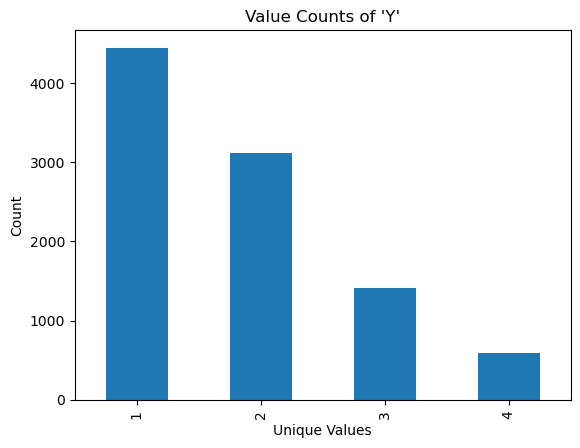

In [72]:
Y.value_counts().plot(kind='bar')
plt.title("Value Counts of 'Y'")
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

## Checking VIF(Variance Inflation Factor) values

In [73]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)
                     for i in range (len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,2.859426,Country_Code
1,9.470340,City
2,8.711518,Longitude
3,6.026842,Latitude
4,1.038284,Average_Cost_for_two
5,16.959919,Currency
6,1.238187,Has_Table_booking
7,1.552150,Has_Online_delivery
8,1.015560,Is_delivering_now
9,5.472521,Aggregate_rating


We can see that all columns have VIF values less than 10 except Currency so, we will drop it.

In [74]:
X.drop('Currency', axis=1, inplace=True)

In [75]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)
                     for i in range (len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,2.490688,Country_Code
1,8.487311,City
2,5.978585,Longitude
3,5.955479,Latitude
4,1.038258,Average_Cost_for_two
5,1.232697,Has_Table_booking
6,1.545478,Has_Online_delivery
7,1.015470,Is_delivering_now
8,5.074701,Aggregate_rating
9,5.163065,Rating_color


Now we can Proceed

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [77]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (7640, 12)
Y_train shape: (7640,)
X_test shape: (1911, 12)
Y_test shape: (1911,)


## LogisticRegression

In [78]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

LR = LogisticRegression()

grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

best_LR = LogisticRegression(**best_params)

best_LR.fit(X_train, Y_train)

pred_LR = best_LR.predict(X_test)

accuracy = accuracy_score(Y_test, pred_LR)
conf_matrix = confusion_matrix(Y_test, pred_LR)
class_report = classification_report(Y_test, pred_LR)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7922553636839351

Confusion Matrix:
 [[893  23   1   1]
 [ 64 460  43   2]
 [ 10 122 149  15]
 [  4  44  68  12]]

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.97      0.95       918
           2       0.71      0.81      0.76       569
           3       0.57      0.50      0.54       296
           4       0.40      0.09      0.15       128

    accuracy                           0.79      1911
   macro avg       0.65      0.59      0.60      1911
weighted avg       0.77      0.79      0.77      1911



Accuracy: 0.7922553636839351

Confusion Matrix:
 [[893  23   1   1]
 [ 64 460  43   2]
 [ 10 122 149  15]
 [  4  44  68  12]]

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.97      0.95       918
           2       0.71      0.81      0.76       569
           3       0.57      0.50      0.54       296
           4       0.40      0.09      0.15       128

    accuracy                           0.79      1911
   macro avg       0.65      0.59      0.60      1911
weighted avg       0.77      0.79      0.77      1911



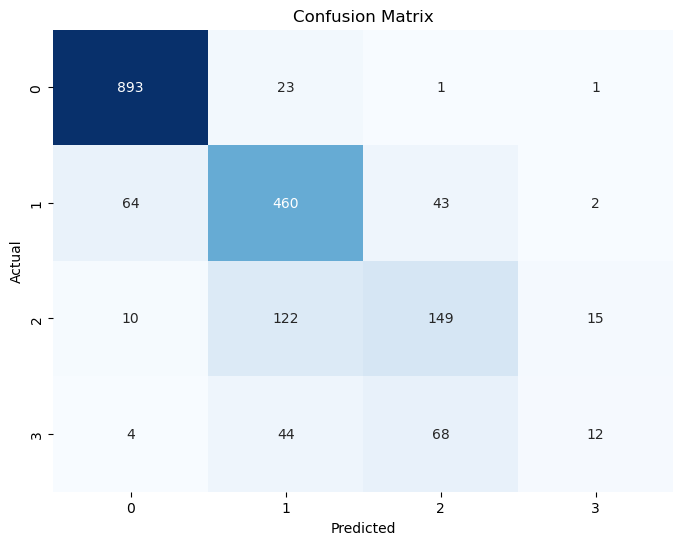

In [79]:
LR = LogisticRegression(C=.1, penalty="l1", solver="liblinear")
LR.fit(X_train, Y_train)

pred_LR = LR.predict(X_test)

acy = accuracy_score(Y_test, pred_LR)
cfmt = confusion_matrix(Y_test, pred_LR)
clfr = classification_report(Y_test, pred_LR)

print("Accuracy:", acy)
print("\nConfusion Matrix:\n", cfmt)
print("\nClassification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## RandomForestClassifier

In [80]:
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'gini'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'gini'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'gini'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'entropy'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'entropy'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'entropy'},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(X_train, Y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'}
Test Accuracy: 0.9759288330716902


Accuracy: 0.9769754055468342
Confusion Matrix:
 [[916   2   0   0]
 [  2 564   3   0]
 [  0  11 280   5]
 [  0   0  21 107]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       918
           2       0.98      0.99      0.98       569
           3       0.92      0.95      0.93       296
           4       0.96      0.84      0.89       128

    accuracy                           0.98      1911
   macro avg       0.96      0.94      0.95      1911
weighted avg       0.98      0.98      0.98      1911



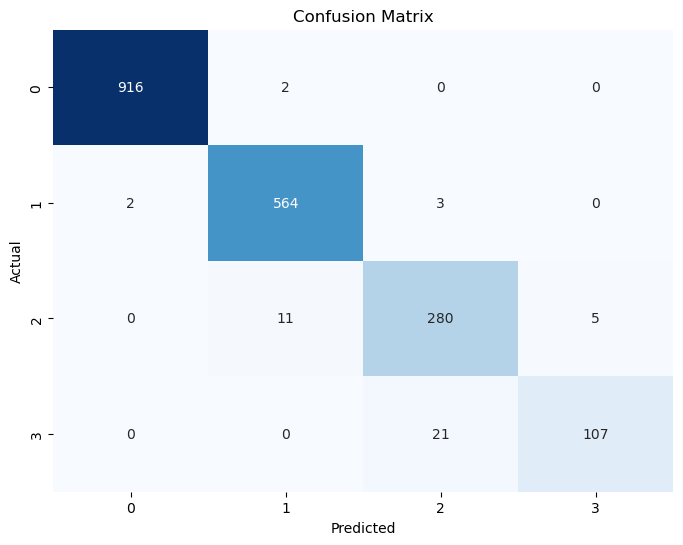

In [81]:
RFC = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=15)
RFC.fit(X_train, Y_train)

pred_RFC = RFC.predict(X_test)

acy = accuracy_score(Y_test, pred_RFC)
cfmt = confusion_matrix(Y_test, pred_RFC)
clfr = classification_report(Y_test, pred_RFC)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Support vector classifier

Accuracy: 0.7849293563579278
Confusion Matrix:
 [[839  79   0   0]
 [  0 568   1   0]
 [  0 214  82   0]
 [  0 117   0  11]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.91      0.96       918
           2       0.58      1.00      0.73       569
           3       0.99      0.28      0.43       296
           4       1.00      0.09      0.16       128

    accuracy                           0.78      1911
   macro avg       0.89      0.57      0.57      1911
weighted avg       0.87      0.78      0.76      1911



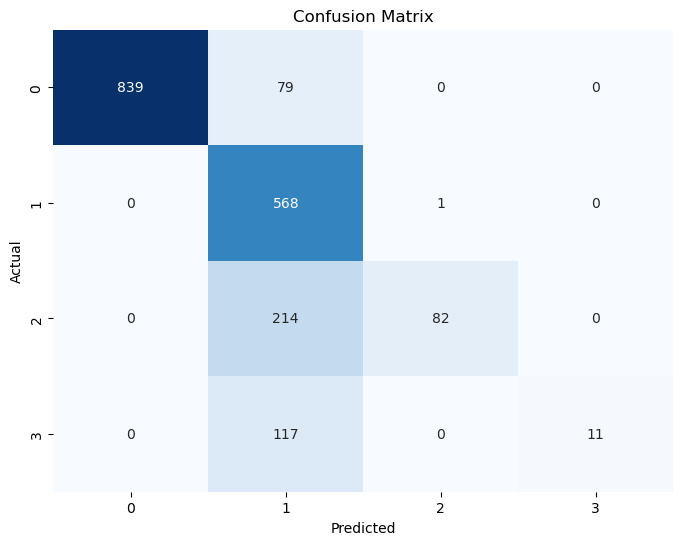

In [82]:
svc_rbf = SVC(kernel='rbf', gamma='auto', C=42)
svc_rbf.fit(X_train, Y_train)

pred_svc_rbf = svc_rbf.predict(X_test)

accuracy = accuracy_score(Y_test, pred_svc_rbf)
conf_matrix = confusion_matrix(Y_test, pred_svc_rbf)
class_report = classification_report(Y_test, pred_svc_rbf)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## DecisionTreeClassifier

In [83]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(X_train, Y_train)
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.9848246991104134


Accuracy: 0.9816849816849816
Confusion Matrix:
 [[914   4   0   0]
 [  1 563   5   0]
 [  0   6 284   6]
 [  0   0  13 115]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       918
           2       0.98      0.99      0.99       569
           3       0.94      0.96      0.95       296
           4       0.95      0.90      0.92       128

    accuracy                           0.98      1911
   macro avg       0.97      0.96      0.96      1911
weighted avg       0.98      0.98      0.98      1911



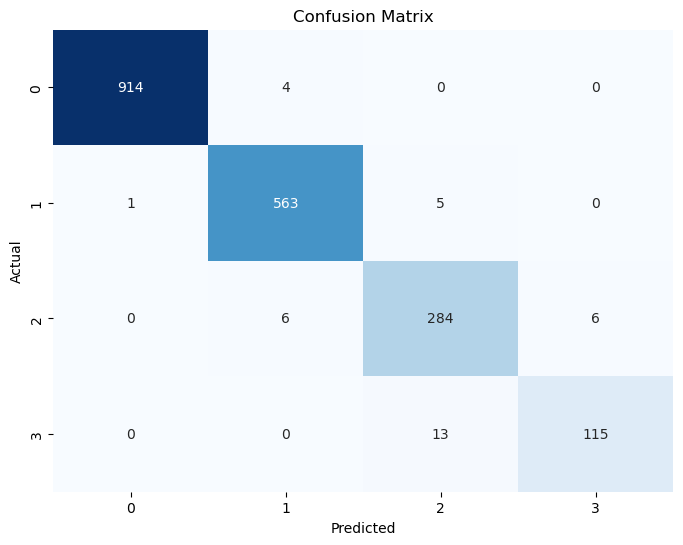

In [85]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
dtc.fit(X_train, Y_train)

pred_dtc = dtc.predict(X_test)

acy = accuracy_score(Y_test, pred_dtc)
cfmt = confusion_matrix(Y_test, pred_dtc)
clfr = classification_report(Y_test, pred_dtc)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## ExtraTreesClassifier

In [86]:
param_combinations = [
    {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    et_classifier = ExtraTreesClassifier(**params, random_state=42)
    et_classifier.fit(X_train, Y_train)
    y_pred = et_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.9382522239665096


Accuracy: 0.9398220826792255
Confusion Matrix:
 [[903  13   0   2]
 [  2 549  17   1]
 [  1  24 255  16]
 [  0   1  38  89]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       918
           2       0.94      0.96      0.95       569
           3       0.82      0.86      0.84       296
           4       0.82      0.70      0.75       128

    accuracy                           0.94      1911
   macro avg       0.89      0.88      0.88      1911
weighted avg       0.94      0.94      0.94      1911



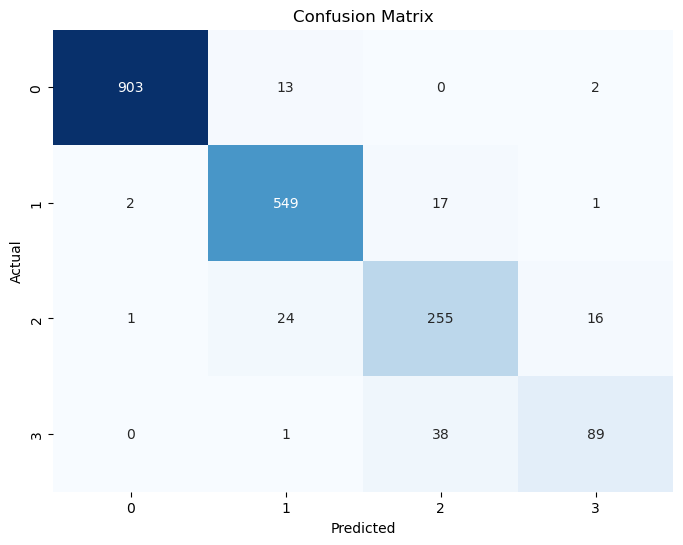

In [87]:
EXC = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
EXC.fit(X_train, Y_train)

pred_EXC = EXC.predict(X_test)

acy = accuracy_score(Y_test, pred_EXC)
cfmt = confusion_matrix(Y_test, pred_EXC)
clfr = classification_report(Y_test, pred_EXC)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## DecisionTreeClassifier work better 

## Cross Validation Score

In [94]:
score = cross_val_score(dtc, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(Y_test, pred_dtc) - score.mean())

[0.16326531 0.18062827 0.2026178  0.19371728 0.18638743]
0.18532321829255266
0.7963617633924289


In [95]:
values = pd.DataFrame({'Actual': Y_test, 'Predicted': pred_dtc})
values.sample(10)  # checking randomly Actual vs Predicted

,Actual,Predicted
4115,1,1
1915,3,3
8300,2,2
4202,2,2
33,2,2
2611,3,3
4421,2,2
7795,1,1
5076,1,1
8834,4,4


##### Model gives almost correct prediction

In [102]:
import joblib
# Save the model as a objectfile

joblib.dump(dtc,'Price_range')

['Price_range']

In [103]:
model_2=joblib.load(open("Price_range","rb"))
model_2

DecisionTreeClassifier()